In [2]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2178139 sha256=b596337109bf45f1578b3b57e0005b84db6a38199ffe4855a2d78d49f090f5f1
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [3]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data

# Initialize the KMedoids model with 3 clusters (Iris has 3 species)
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X)

# Output the cluster labels for each data point
print("Cluster labels for each sample:", kmedoids.labels_)

# Output which samples were selected as medoids
print("Indices of medoids:", kmedoids.medoid_indices_)
print("Medoid coordinates:\n", X[kmedoids.medoid_indices_])

# Visualize: first two features only for 2D plotting
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_, cmap='viridis', edgecolor='k')
plt.scatter(X[kmedoids.medoid_indices_, 0], X[kmedoids.medoid_indices_, 1],
            marker='x', s=200, c='red', label='Medoids')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("K-Medoids Clustering (Iris dataset)")
plt.legend()
plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=7914b569c6ffa5cadc20ecaa12001c48e47db44f87e3043545d5900017faea69
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering
Clusters: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149], [100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125

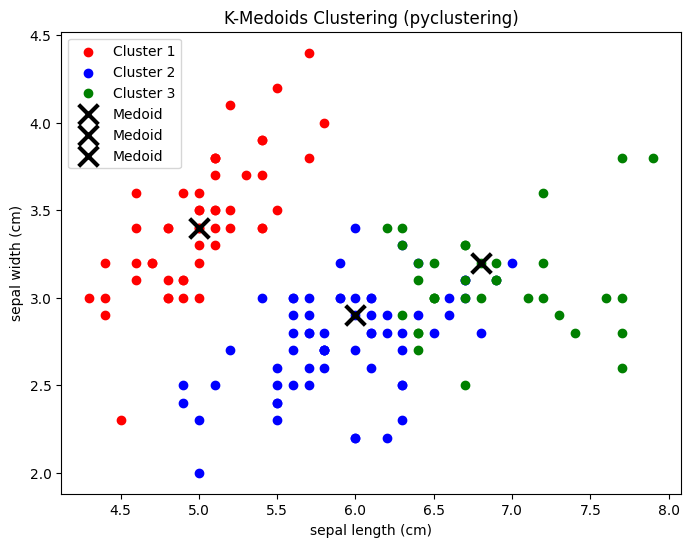

In [4]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data

# Initial medoid indices (choose randomly, or pick 3 different indices)
initial_medoids = [0, 50, 100]

# Run K-medoids
kmedoids_instance = kmedoids(X, initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
final_medoids = kmedoids_instance.get_medoids()

print("Clusters:", clusters)
print("Medoid indices:", final_medoids)

# Plot using first two features only
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8,6))
for idx, cluster in enumerate(clusters):
    cluster_np = np.array([X[i] for i in cluster])
    plt.scatter(cluster_np[:, 0], cluster_np[:, 1], c=colors[idx], label=f'Cluster {idx+1}')
for medoid in final_medoids:
    plt.scatter(X[medoid][0], X[medoid][1], marker='x', c='black', s=200, linewidth=3, label='Medoid')
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.title("K-Medoids Clustering (pyclustering)")
plt.legend()
plt.show()
